In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# 1번
- 데이터 경로 /kaggle/input/adp-p6/problem1.csv 

### 데이터 설명
- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.     
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.     
- Description: Product (item) name. Nominal.    
- Quantity: The quantities of each product (item) per transaction. Numeric.     
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.   
- UnitPrice: Unit price. Numeric, Product price per unit in sterling.    
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.     
- Country: Country name. Nominal, the name of the country where each customer resides.     


### 데이터 출처
- https://archive.ics.uci.edu/ml/index.php

In [136]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem1.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France


## 1-1. 결측치를 확인하고, 결측치 제거할 것

In [140]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity       25
InvoiceDate     0
UnitPrice      97
CustomerID      0
Country         0
dtype: int64

In [138]:
print('<답안>')
print('Quantity와 UnitPrice에 일부 이상치가 존재한다.')

<답안>
Quantity와 UnitPrice에 일부 이상치가 존재한다.


In [141]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [142]:
print('결측치 제거를 진행하고, 모든 변수에 결측치가 없음을 확인하였다.')

결측치 제거를 진행하고, 모든 변수에 결측치가 없음을 확인하였다.


## 1-2. 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타낼 것

In [144]:
print('<답안>')
print('IQR method를 활용하여 이상치를 탐지하고자 한다. IQR 방법은 제 1사분위수와 제 3사분위수에서 각각 아래쪽과 위쪽으로 IQR*1.5 이상 차이가 나는 값을 이상치로 처리하는 방법이다. IQR 이상치를 쉽게 확인하는 방법은 boxplot을 그려보는 것이다.')
print('연속형 변수를 갖는 Quantity와 UnitPrice에 대하여 boxplot을 그려 이상치를 확인하였다.')

<답안>
IQR method를 활용하여 이상치를 탐지하고자 한다. IQR 방법은 제 1사분위수와 제 3사분위수에서 각각 아래쪽과 위쪽으로 IQR*1.5 이상 차이가 나는 값을 이상치로 처리하는 방법이다. IQR 이상치를 쉽게 확인하는 방법은 boxplot을 그려보는 것이다.
연속형 변수를 갖는 Quantity와 UnitPrice에 대하여 boxplot을 그려 이상치를 확인하였다.


<Axes: >

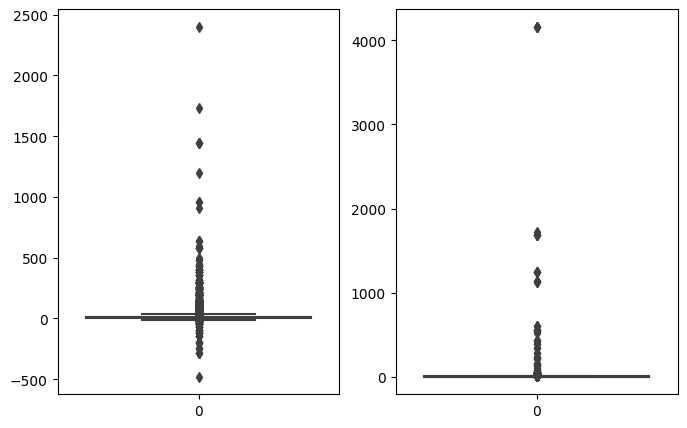

In [147]:
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
sns.boxplot(df['Quantity'], ax=axes[0])
sns.boxplot(df['UnitPrice'], ax=axes[1])

In [152]:
print("Quantity 변수에 다수의 음수 값이 포착되었다. 이는 취소 주문에서 볼 수 있는 수치인데, 정상 주문과 취소 주문을 합쳐 Quantity를 재성성 해야한다.")

Quantity 변수에 다수의 음수 값이 포착되었다. 이는 정상적인 주문에서 나올 수 없는 수치이다.
많은 값이 이상치로 잡히는 것을 확인하고, Quantity와 UnitPrice의 skewness를 측정해 보니 각각 14.830917897724287, 64.19999180300915으로 확인되었다. 따라서 이상치를 제거하기 전 변수 변환을 통해 왜도를 줄여야 과한 이상치 제거를 막을 수 있다.


In [156]:
df[df.Quantity > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,563808,22432,WATERING CAN PINK BUNNY,6.0,8/19/2011 11:46,1.95,12626.0,Germany
1,561645,23166,MEDIUM CERAMIC TOP STORAGE JAR,12.0,7/28/2011 15:16,1.25,14911.0,EIRE
2,568651,20985,HEART CALCULATOR,12.0,9/28/2011 12:04,1.25,12362.0,Belgium
3,541711,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,24.0,1/21/2011 11:18,1.25,14646.0,Netherlands
4,554134,21154,RED RETROSPOT OVEN GLOVE,10.0,5/23/2011 9:48,1.25,12583.0,France
...,...,...,...,...,...,...,...,...
35796,554137,21668,RED STRIPE CERAMIC DRAWER KNOB,12.0,5/23/2011 10:13,1.25,12708.0,Germany
35797,572986,22895,SET OF 2 TEA TOWELS APPLE AND PEARS,6.0,10/27/2011 10:51,3.25,12681.0,France
35798,579927,22734,SET OF 6 RIBBONS VINTAGE CHRISTMAS,6.0,12/1/2011 9:20,2.89,12572.0,Germany
35799,551163,22431,WATERING CAN BLUE ELEPHANT,1.0,4/26/2011 15:52,1.95,12573.0,France


In [178]:
cancel_invoice = [int(invoice_no[1:]) for invoice_no in df[df.Quantity <= 0].InvoiceNo]

normal_invoice = df[df.Quantity > 0]
for invoice in normal_invoice.InvoiceNo:
    if invoice in cancel_invoice:
        print(invoice)

df = df[df.Quantity > 0]
print('취소 주문 중, 기존 주문에 대한 취소는 존재하지 않는다. 그리고 취소 주문의 경우 분석하는 의미가 없는 데이터이므로 제거해 준다.')
print(f"또한, Boxplot에서 많은 값이 이상치로 잡히는 것을 확인하고, Quantity와 UnitPrice의 skewness를 측정해 보니 각각 {df['Quantity'].skew()}, {df['UnitPrice'].skew()}으로 확인되었다. 따라서 이상치를 제거하기 전 변수 변환을 통해 왜도를 줄여야 과한 이상치 제거를 막을 수 있다.")

취소 주문 중, 기존 주문에 대한 취소는 존재하지 않는다. 그리고 취소 주문의 경우 분석하는 의미가 없는 데이터이므로 제거해 준다.
또한, Boxplot에서 많은 값이 이상치로 잡히는 것을 확인하고, Quantity와 UnitPrice의 skewness를 측정해 보니 각각 15.372981283298156, 90.09778268655988으로 확인되었다. 따라서 이상치를 제거하기 전 변수 변환을 통해 왜도를 줄여야 과한 이상치 제거를 막을 수 있다.


로그 변환을 수행한 다음 Quantity와 UnitPrice의 skewness를 측정해 보니 각각 0.7120770893216234, 1.259242690714804으로 확인되었다. log 변수에 대해 다시 Boxplot을 그리면 아래와 같다.


<Axes: >

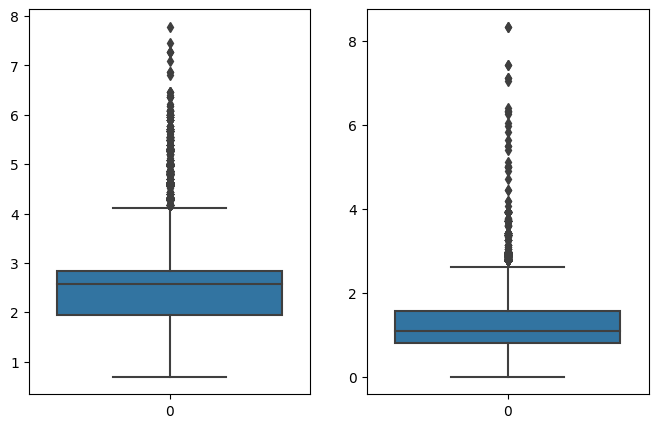

In [180]:
print(f"로그 변환을 수행한 다음 Quantity와 UnitPrice의 skewness를 측정해 보니 각각 {np.log1p(df['Quantity']).skew()}, {np.log1p(df['UnitPrice']).skew()}으로 확인되었다. log 변수에 대해 다시 Boxplot을 그리면 아래와 같이 왜도가 완화된 그래프를 볼 수 있다.")
fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
sns.boxplot(np.log1p(df['Quantity']), ax=axes[0])
sns.boxplot(np.log1p(df['UnitPrice']), ax=axes[1])

In [272]:
df['Quantity_log'] = np.log1p(df['Quantity'])
df['UnitPrice_log'] = np.log1p(df['UnitPrice'])

In [273]:
df['Quantity_outlier'] = np.where(df['Quantity_log'] > df['Quantity_log'].quantile(0.75) + (1.5 * IQR), 1, 0)
df['UnitPrice_outlier'] = np.where(df['UnitPrice_log'] > df['UnitPrice_log'].quantile(0.75) + (1.5 * IQR), 1, 0)
print(f"이상치로 판단된 개수는 Quantity가 {df['Quantity_outlier'].sum()}개, UnitPrice는 {df['UnitPrice_outlier'].sum()}개 이다.")
print('log를 취한 Boxplot에서도 다수의 이상치가 발견되었다. 이를 모두 제거하는 것은 이상치 자체가 의미가 있을 수도 있기 때문에 위험하다. 따라서 이상치 여부를 파생변수로 생성한다.')

이상치로 판단된 개수는 Quantity가 2072개, UnitPrice는 980개 이다.
log를 취한 Boxplot에서도 다수의 이상치가 발견되었다. 이를 모두 제거하는 것은 이상치 자체가 의미가 있을 수도 있기 때문에 위험하다. 따라서 이상치 여부를 파생변수로 생성한다.


In [274]:
df['Quantity_outlier'].value_counts()

Quantity_outlier
0    32616
1     2072
Name: count, dtype: int64

## 1-3 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성할 것

In [275]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

scaler = RobustScaler()
x_scaled = scaler.fit_transform(df.loc[:, ['Quantity_log', 'UnitPrice_log']])
x_scaled_df = pd.DataFrame(x_scaled, columns=['Quantity_log', 'UnitPrice_log'])

encoder = LabelEncoder()
country_labeled = encoder.fit_transform(df['Country'])

In [276]:
x_scaled_df['Country_labeled'] = country_labeled
x_scaled_df['Country_labeled'] = x_scaled_df['Country_labeled'].astype('category')

In [ ]:
x_scaled_df['Quantity_outlier'] = np.where(df['Quantity_log'] > df['Quantity_log'].quantile(0.75) + (1.5 * IQR), 1, 0)
x_scaled_df['UnitPrice_outlier'] = np.where(df['UnitPrice_log'] > df['UnitPrice_log'].quantile(0.75) + (1.5 * IQR), 1, 0)

x_scaled_df['Quantity_outlier'] = x_scaled_df['Quantity_outlier'].astype('category')
x_scaled_df['UnitPrice_outlier'] = x_scaled_df['UnitPrice_outlier'].astype('category')

In [204]:
### elbow plot
def elbow(x):
    sse=[]
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
    print(sse)

In [299]:
x_scaled_df

,Quantity_log,UnitPrice_log,Country_labeled,Quantity_outlier,UnitPrice_outlier,cluster
0,-0.697664,0.000000,3,0,0,2
1,0.000000,-0.362513,1,0,0,2
2,0.000000,-0.362513,0,0,0,2
3,0.736982,-0.362513,4,0,0,2
4,-0.188272,-0.362513,2,0,0,2
...,...,...,...,...,...,...
34683,0.000000,-0.362513,3,0,0,2
34684,-0.697664,0.488633,2,0,0,0
34685,-0.697664,0.370180,3,0,0,0
34686,-2.109541,0.000000,2,0,0,0


/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default 

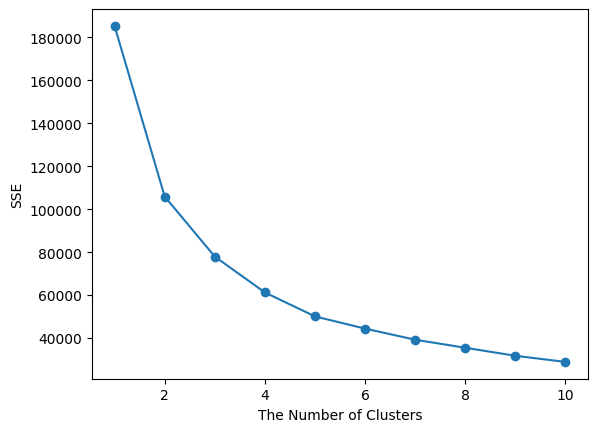

[185383.3864418613, 105909.60727751988, 77946.63726485337, 61237.32185297791, 50065.6057494588, 44373.30269234608, 39212.16486943363, 35459.134787053306, 31723.45222944753, 28866.06944027597]


In [287]:
elbow(x_scaled_df)

In [288]:
print('군집화는 변수 Scale에 영향을 많이 받기 때문에 수행 전 scaling 과정이 필요하다. 이 경우에는 이상치 다수가 존재하고 있으므로 RobustScaler를 사용한다.')
print('Quantity_log와 UnitPrice_log 두 변수에 Robust Scaling을 적용하고, 위에서 생성한 Outlier 여부 변수와 Country 변수를 추가하였다.')
print('Country 변수는 범주형 변수로, 숫자 형태로 변경하는 Label Encoding 과정을 수행하고, Categorical 변수로 변환하였다. Outlier 여부 변수도 마찬가지로 Catagorical 변수로 변환하였다.')
print('전처리 된 최종 데이터에 대해 K-means 클러스터링을 수행했고, elbow plot을 확인하니 n=3에서 elbow가 확인되었다.')

군집화는 변수 Scale에 영향을 많이 받기 때문에 수행 전 scaling 과정이 필요하다. 이 경우에는 이상치 다수가 존재하고 있으므로 RobustScaler를 사용한다.
Quantity_log와 UnitPrice_log 두 변수에 Robust Scaling을 적용하고, 위에서 생성한 Outlier 여부 변수와 Country 변수를 추가하였다.
Country 변수는 범주형 변수로, 숫자 형태로 변경하는 Label Encoding 과정을 수행하고, Categorical 변수로 변환하였다. Outlier 여부 변수도 마찬가지로 Catagorical 변수로 변환하였다.
전처리 된 최종 데이터에 대해 K-means 클러스터링을 수행했고, elbow plot을 확인하니 n=3에서 elbow가 확인되었다.


In [320]:
#최적의 k로  K-Means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(x_scaled_df)

# 할당된 군집을 데이터에 추가
new_labels = km.labels_
df['cluster'] = new_labels

/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='UnitPrice', ylabel='Quantity'>

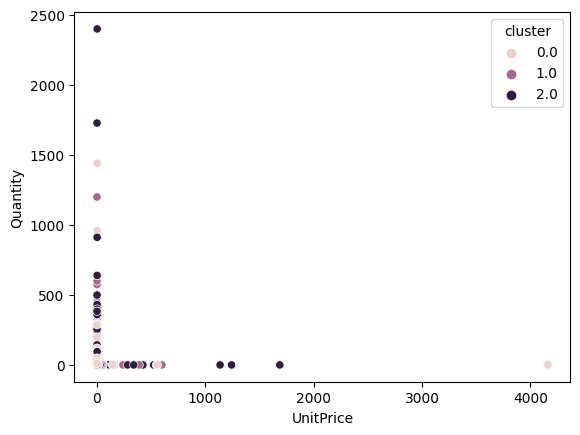

In [310]:
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, hue=x_scaled_df['cluster'])

# 2번

## 2-1. 위에서 생성한 군집들의 특성을 분석할 것

<Axes: xlabel='Country', ylabel='count'>

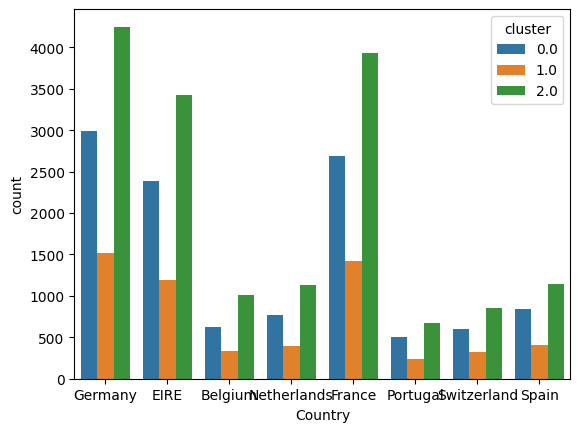

In [297]:
sns.countplot(x=df['Country'], data=df, hue=df['cluster'])

In [307]:
cal_mean = df.loc[:, ["Quantity", "UnitPrice", "cluster"]].groupby('cluster').mean()
cal_mean

,Quantity,UnitPrice
cluster,,
0.0,19.151842,4.089661
1.0,19.606217,3.652226
2.0,19.225236,4.108685


In [308]:
cal_mean['Quantity'] * cal_mean['UnitPrice']

cluster
0.0    78.324549
1.0    71.606328
2.0    78.990443
dtype: float64

In [309]:
print('나라 별 Cluster의 분포를 확인해 보면, 각 나라별로 클러스터의 분포가 비교적 고르게 되어 있다. 따라서 clustering에 나라의 영향은 크게 없다.')
print('Cluster 2는 Quantity와 UnitPrice 평균이 높아 총 구매액이 가장 높다.')
print('Cluster 1는 Quantity 평균이 가장 높지만, UnitPrice 평균이 낮아 총 구매액은 가장 적다')
print('Cluster 0은 Quantity 평균이 가장 낮지만, UnitPrice 평균이 높아 Cluter 1보다 총 구매액이 높다.')

나라 별 Cluster의 분포를 확인해 보면, 각 나라별로 클러스터의 분포가 비교적 고르게 되어 있다. 따라서 clustering에 나라의 영향은 크게 없다.
Cluster 2는 Quantity와 UnitPrice 평균이 높아 총 구매액이 가장 높다.
Cluster 1는 Quantity 평균이 가장 높지만, UnitPrice 평균이 낮아 총 구매액은 가장 적다
Cluster 0은 Quantity 평균이 가장 낮지만, UnitPrice 평균이 높아 Cluter 1보다 총 구매액이 높다.


## 2-2. 각 군집 별 대표 추천 상품을 도출할 것

In [341]:
from scipy.spatial import distance

In [342]:
min_distance = [np.Inf, np.Inf, np.Inf]
min_distance_index = [0, 0, 0]
for i in x_scaled_df.index:
    for j in range(3):
        dist = distance.euclidean(x_scaled_df.iloc[i], km.cluster_centers_[j])
        if dist < min_distance[j]:
            min_distance[j] = dist
            min_distance_index[j] = i

In [345]:
df.iloc[min_distance_index]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_log,UnitPrice_log,Quantity_outlier,UnitPrice_outlier,cluster
430,542425,22854,CREAM SWEETHEART EGG HOLDER,4.0,1/28/2011 9:20,4.95,12574.0,France,1.609438,1.783391,0,0,0
11891,577039,23163,REGENCY SUGAR TONGS,8.0,11/17/2011 13:30,2.49,12539.0,Spain,2.197225,1.249902,0,0,2
502,551539,23077,DOUGHNUT LIP GLOSS,20.0,5/3/2011 8:40,1.25,12598.0,France,3.044522,0.810930,0,0,1


In [346]:
print('각 군집별로 중심점과 유클라디안 거리가 가장 가까운 데이터를 도출한 결과, Cluster 0에서는 CREAM SWEETHEART EGG HOLDER, Cluster 1에서는 DOUGHNUT LIP GLOSS, Cluster 2에서는 REGENCY SUGAR TONGS가 대표 상품으로 추천된다.')

각 군집별로 중심점과 가장 가까운 데이터를 도출한 결과, Cluster 0에서는 CREAM SWEETHEART EGG HOLDER, Cluster 1에서는 DOUGHNUT LIP GLOSS, Cluster 2에서는 REGENCY SUGAR TONGS가 대표 상품으로 추천된다.


## 2-3. CustomerID가 12413인 고객을 대상으로 상품을 추천할 것

In [354]:
df.loc[df.CustomerID==12413.0]['cluster'].mean()

0.42105263157894735

In [355]:
print("해당 고객은 Cluster 0에 속할 확률이 가장 높기 때문에, CREAM SWEETHEART EGG HOLDER를 추천하는 것이 가장 좋아 보인다.") 

해당 고객은 Cluster 0에 속할 확률이 가장 높기 때문에, CREAM SWEETHEART EGG HOLDER를 추천하는 것이 가장 좋아 보인다.


# 3번
### 철강제품의 불량률을 조사하고자 한다. 이 때 불량률은 90%, 추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [27]:
import math

In [360]:
print('철강제품의 불량률은 비율 변수이므로, 표본비율의 추정 문제로 판단할 수 있다. 이 때의 오차 한계를 d라고 한다면 표본 크기는 ((Z0.95/d)**2 * p * (1-p))보다 큰 값으로 정의되며, 모비율 p는 0.9로 추정한다.')
print(f'이에 따라 계산한 최소 표본 크기는 {math.ceil(((stats.norm.ppf(0.975)/0.05)**2)*(0.9*0.1))}이다.')

철강제품의 불량률은 비율 변수이므로, 표본비율의 추정 문제로 판단할 수 있다. 이 때의 오차 한계를 d라고 한다면 표본 크기는 ((Z0.95/d)**2 * p * (1-p))보다 큰 값으로 정의되며, 모비율 p는 0.9로 추정한다.
이에 따라 계산한 최소 표본 크기는 139이다.


# 4번
### 다음은 1월부터 9월까지의 은의 가격이다
![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem2.png?raw=true)

## 4-1 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라

In [2]:
silver = pd.DataFrame([12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38], columns=['USD/oz'])

In [3]:
silver

,USD/oz
0,12.14
1,42.60
2,34.40
3,35.29
4,30.96
5,57.12
6,37.84
7,42.49
8,31.38


이동평균 3 시계열 그래프를 추가로 그리면 아래와 같다. 파란 색이 은의 가격, 빨간 색이 이동평균 3이 적용된 그래프이다.


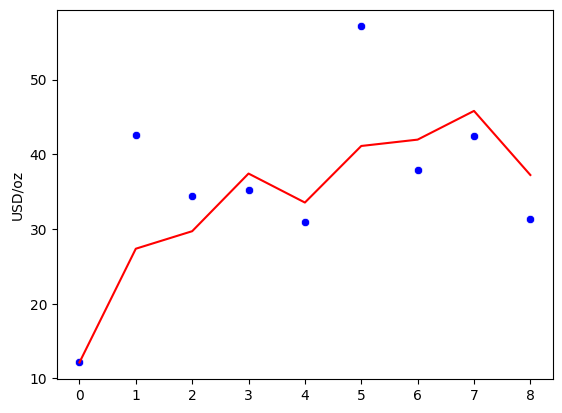

In [356]:
print('이동평균 3 시계열 그래프를 추가로 그리면 아래와 같다. 파란 색이 은의 가격, 빨간 색이 이동평균 3이 적용된 그래프이다.')
sns.scatterplot(silver['USD/oz'], color='blue')
sns.lineplot(silver['USD/oz'].rolling(3, min_periods=1).mean(), color='red')
plt.show()

## 4-2 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [17]:
jan_silver = 12.14
sep_silver = 31.38

print(f'1월 대비 9월의 은 가격은 {round(sep_silver/jan_silver *100, 1)}% 상승하였다.')

1월 대비 9월의 은 가격은 258.5% 상승하였다.


# 5번 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다.      
# 자치구별 지지율이 같은지에 대해서 검정하라



![image](https://github.com/Datamanim/datarepo/blob/main/adp/26/problem3.png?raw=true)

## 5-1 연구가설과 귀무가설을 설정하라

In [30]:
print('<답안>')
print('H0: A, B, C 자치구별 W의원에 대한 지지율은 독립이다.')
print('H1: A, B, C 자치구별 W의원에 대한 지지율은 독립이 아니다.')

<답안>
H0: A, B, C 자치구별 W의원에 대한 지지율은 같다.
H1: A, B, C 자치구별 W의원에 대한 지지율은 차이가 있다.


## 5-2 검정통계량 구하고 결론을 내라

In [361]:
table = pd.DataFrame({'A':[176, 124], 'B': [193, 107], 'C': [159, 141]})
table

,A,B,C
0,176,193,159
1,124,107,141


In [362]:
from scipy.stats import chi2_contingency

In [363]:
chi, p, df, expect = chi2_contingency(table) 
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect: \n', expect)

Statistic: 7.945381231671554
p-value: 0.01882272023214683
df: 2
expect: 
 [[176. 176. 176.]
 [124. 124. 124.]]


In [364]:
print(f'Chi-sq 검정통계량은 {chi}, p-value {p}로 유의수준 0.05 하에서 귀무가설을 기각한다. A, B, C 자치구별 W의원에 대한 지지율 차이가 있다고 볼 통계적 근거가 있다.')

Chi-sq 검정통계량은 7.945381231671554, p-value 0.01882272023214683로 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. A, B, C 자치구별 W의원에 대한 지지율 차이가 있다고 볼 통계적 근거가 없다.


# 6번 
## A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 problem4.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

In [128]:
df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


## 6-1. 연구가설과 귀무가설 설정하라

In [129]:
print('<답안>')
print('H0: A 초등학교의 남학생과 여학생은 평균 혈압 차이가 없다.')
print('H1: A 초등학교의 남학생과 여학생은 평균 혈압 차이가 있다.')

<답안>
H0: A 초등학교의 남학생과 여학생은 평균 혈압 차이가 없다.
H1: A 초등학교의 남학생과 여학생은 평균 혈압 차이가 있다.


## 6-2. 통계량을 구하고, 연구가설 채택여부를 기술하라.

In [130]:
stats.ttest_ind(df[df.gender=='male']['pressure'], df[df.gender=='female']['pressure'], equal_var=True) 

Ttest_indResult(statistic=1.598335024574904, pvalue=0.1236171636431485)

In [131]:
print('남학생과 여학생의 혈압 데이터는 정규분포를 따르고 등분산임을 가정하고 있으며, 표본 개수가 25개로 크지 않으므로 독립된 두 집단의 T-test를 수행할 수 있다.')
print('T-test 검정통계량은 1.60, p-value 0.12로 귀무가설을 기각하지 않는다. 따라서 A 초등학교 남학생과 여학생의 평균 혈압 차이가 있다고 볼 통계적 근거가 부족하다.')

남학생과 여학생의 혈압 데이터는 정규분포를 따르고 등분산임을 가정하고 있으며, 표본 개수가 25개로 크지 않으므로 독립된 두 집단의 T-test를 수행할 수 있다.
T-test 검정통계량은 1.60, p-value 0.12로 귀무가설을 기각하지 않는다. 따라서 A 초등학교 남학생과 여학생의 평균 혈압 차이가 있다고 볼 통계적 근거가 부족하다.


## 6-3. 6-2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [ ]:
interval = stats.t.interval(alpha=0.95, df=df, loc=mu, scale=se)

In [135]:
data_1 = df[df.gender=='male']['pressure']
data_2 = df[df.gender=='female']['pressure']

n_1 = len(data_1)
n_2 = len(data_2)
s_pooled = ((n_1 - 1)*np.var(data_1) + (n_2 - 1)*np.var(data_2)) / (n_1 + n_2 - 2)

mean_diff = np.mean(data_1) - np.mean(data_2)

In [133]:
stats.t.interval(alpha=0.95, df=(n_1 + n_2 - 2), loc=mean_diff, scale=np.sqrt(s_pooled)*np.sqrt((1/n_1) + (1/n_2)))

(-1.5104370071999504, 14.125714784977756)

In [134]:
print('성별 평균 혈압 차이의 95% 신뢰구간은 (-1.51, 14.13) 이다.')

성별 평균 혈압 차이의 95% 신뢰구간은 (-1.51, 14.13) 이다.


# 7번 
## height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하라.
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.      
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다

In [107]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


## 7-1 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
- 베이지안 회귀
- 시드넘버 1234로 지정
- 1000번의 burn-in 이후 10,000의 MCMC를 수행
- 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution), 오차항의 분산의 사전분포는 역감마 분포로 지정. 이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.

In [109]:
x = df[["height", "weight"]]
y = df["waistline"]

In [110]:
from sklearn.linear_model import ARDRegression

In [111]:
# 1000번의 burn-in 이후 10,000의 MCMC를 수행
# 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution),
# 오차항의 분산의 사전분포는 역감마 분포로 지정. 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.
ard = ARDRegression(threshold_lambda=10000, alpha_2=0.005, lambda_2=0.005, fit_intercept=False) ## 부적절한 균일분포, inverse gamma를 0.005로 지정
ard.fit(x, y)

ARDRegression(alpha_2=0.005, fit_intercept=False, lambda_2=0.005,
              threshold_lambda=10000)

In [112]:
ard.coef_

array([ 0.54450434, -0.20484747])

In [114]:
ard.intercept_

0.0

In [116]:
print('베이지안 회귀의 회귀계수는 y=0.55*height -0.21*weight이다')

베이지안 회귀의 회귀계수는 y=0.55*height -0.21*weight이다


## 7-2 7-1에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [357]:
print(f'키 180cm, 허리둘레 85cm인 남성의 몸무게 추정 값은 {ard.predict([[180, 85]])[0]}이다')
print("끝. 7페이지")

키 180cm, 허리둘레 85cm인 남성의 몸무게 추정 값은 80.59874677098543이다
끝. 7페이지


/Users/hyunjoong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but ARDRegression was fitted with feature names
  warnings.warn(
